<a href="https://colab.research.google.com/github/yugasri244/Yuga7/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),          # Convert 2D to 1D
    layers.Dense(128, activation='relu'),          # Hidden layer
    layers.Dropout(0.2),                           # Prevent overfitting
    layers.Dense(10, activation='softmax')         # Output layer (10 digits)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8511 - loss: 0.5139 - val_accuracy: 0.9643 - val_loss: 0.1305
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9517 - loss: 0.1625 - val_accuracy: 0.9737 - val_loss: 0.0970
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9650 - loss: 0.1159 - val_accuracy: 0.9762 - val_loss: 0.0841
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9724 - loss: 0.0925 - val_accuracy: 0.9780 - val_loss: 0.0761
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9762 - loss: 0.0808 - val_accuracy: 0.9808 - val_loss: 0.0731
313/313 - 1s - 2ms/step - accuracy: 0.9784 - loss: 0.0754

Test accuracy: 0.9783999919891357


In [6]:
# Predict and visualize some examples
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    true_label_val = true_label

    if predicted_label == true_label_val:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"Pred: {predicted_label} (True: {true_label_val})", color=color)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


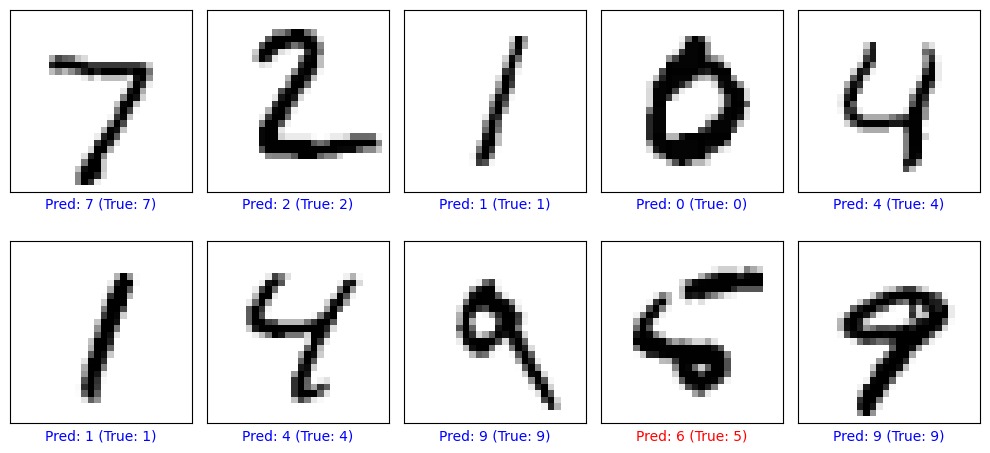

In [7]:
# Display a few prediction examples
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()